In [1]:
# setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

from Starts.start import *
from Starts.startml import *
from Starts.startvis import *  # Commented because of deprecated basemap-package
%matplotlib inline

C:\Users\Duc-LongPhan\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Using TensorFlow backend.


Start importing folder
['.gitignore', '01-22-2020.csv', '01-23-2020.csv', '01-24-2020.csv', '01-25-2020.csv', '01-26-2020.csv', '01-27-2020.csv', '01-28-2020.csv', '01-29-2020.csv', '01-30-2020.csv', '01-31-2020.csv', '02-01-2020.csv', '02-02-2020.csv', '02-03-2020.csv', '02-04-2020.csv', '02-05-2020.csv', '02-06-2020.csv', '02-07-2020.csv', '02-08-2020.csv', '02-09-2020.csv', '02-10-2020.csv', '02-11-2020.csv', '02-12-2020.csv', '02-13-2020.csv', '02-14-2020.csv', '02-15-2020.csv', '02-16-2020.csv', '02-17-2020.csv', '02-18-2020.csv', '02-19-2020.csv', '02-20-2020.csv', '02-21-2020.csv', '02-22-2020.csv', '02-23-2020.csv', '02-24-2020.csv', '02-25-2020.csv', '02-26-2020.csv', '02-27-2020.csv', '02-28-2020.csv', '02-29-2020.csv', 'README.md']
None
None


In [2]:
Start.kwargs

{'folder_path': './COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/',
 'data_path': '',
 'drop_obj_col': False,
 'nan_drop_col': False,
 'nan_drop_row': False,
 'nan_zero': False,
 'nan_mean': True,
 'nan_mean_neighbors': False,
 'pandas_type': True}

In [3]:
Start.kwargs['folder_path'], len(data)

('./COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/', 39)

In [4]:
data[0].head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN


In [5]:
traindata = data[0]
traindata['Country/Region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea'], dtype=object)

In [6]:
skdat = traindata['Country/Region'] == 'South Korea'
traindata[skdat]

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
37,NaN,South Korea,1/22/2020 17:00,1.0,NaN,NaN


In [7]:
StartML.searchByValue(data[0], column='Country/Region', value='South Korea')

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
37,NaN,South Korea,1/22/2020 17:00,1.0,NaN,NaN


In [8]:
StartML.searchByValue(data[37], column='Country/Region', value='South Korea')

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
1,NaN,South Korea,2020-02-28T08:53:03,2337,13,22


In [9]:
# Processing NaN value
y_dat = [StartML.searchByValue(data[i], column='Country/Region', value='Mainland China')['Confirmed'].values 
         for i in range(len(data))]
y_dat[0], y_dat[1], y_dat[2]

y_dat[0] = np.array([y for y in y_dat[1] if not np.isnan(y)])
y_dat[1] = np.array([y for y in y_dat[1] if not np.isnan(y)])
y_dat[2] = np.array([y for y in y_dat[2] if not np.isnan(y)])
y_dat[0], y_dat[1], y_dat[2]

(array([  9.,  22.,   9.,   5.,   2.,  32.,   5.,   3.,   5.,   1.,   2.,
          5., 444.,   9.,   5.,   7.,   1.,   3.,   1.,   3.,   6.,  16.,
          1.,   8.,   4.,   2.,   2.,  27.]),
 array([  9.,  22.,   9.,   5.,   2.,  32.,   5.,   3.,   5.,   1.,   2.,
          5., 444.,   9.,   5.,   7.,   1.,   3.,   1.,   3.,   6.,  16.,
          1.,   8.,   4.,   2.,   2.,  27.]),
 array([549.,  53.,  43.,  36.,  27.,  24.,  23.,  20.,  18.,  15.,  15.,
         15.,  10.,   9.,   9.,   8.,   8.,   5.,   5.,   4.,   4.,   3.,
          3.,   2.,   2.,   2.,   2.,   1.,   1.]))

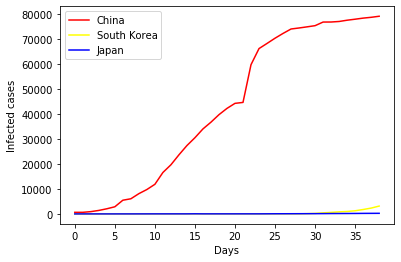

In [10]:
x_dat = np.arange(len(data))

plt.xlabel('Days')
plt.ylabel('Infected cases')
    
y_dat_cn = [sum(y) for y in y_dat]
plt.plot(x_dat, y_dat_cn, color='red')

y_dat_kn = [StartML.searchByValue(data[i], column='Country/Region', value='South Korea')['Confirmed'].values[0]
         for i in range(len(data))]
plt.plot(x_dat, y_dat_kn, color='yellow')

y_dat_jap = [StartML.searchByValue(data[i], column='Country/Region', value="Japan")['Confirmed'].values[0]
             for i in range(len(data))]
plt.plot(x_dat, y_dat_jap, color='blue')

plt.legend(["China", "South Korea", "Japan"])

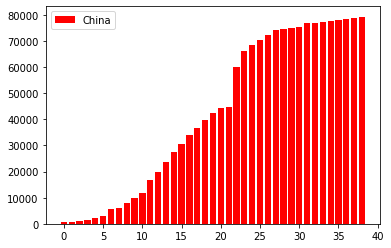

In [11]:
y_dat_cn = [sum(y) for y in y_dat]
plt.bar(x_dat, y_dat_cn, color='red')
plt.legend(["China"])

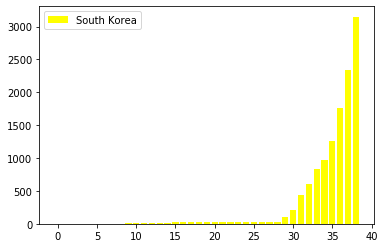

In [12]:
y_dat_kn = [StartML.searchByValue(data[i], column='Country/Region', value='South Korea')['Confirmed'].values[0]
            for i in range(len(data))]
plt.bar(x_dat, y_dat_kn, color='yellow')
plt.legend(["South Korea"])

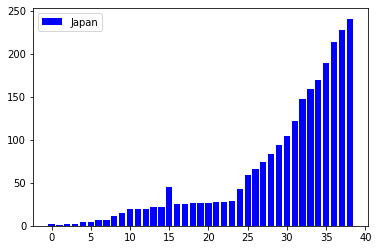

In [13]:
y_dat_jap = [StartML.searchByValue(data[i], column='Country/Region', value="Japan")['Confirmed'].values[0]
             for i in range(len(data))]
plt.bar(x_dat, y_dat_jap, color='blue')
plt.legend(["Japan"])